In [2]:
import subprocess
import sys

def import_or_install(module_name):
    try:
        # 嘗試導入模組
        __import__(module_name)
    except ImportError:
        # 如果模組不存在，則安裝它
        subprocess.check_call([sys.executable, "-m", "pip", "install", module_name])

# 測試範例
import_or_install("scipy")
import_or_install("numpy")
import_or_install("matplotlib")

## 離散餘弦轉換（DCT）的範例

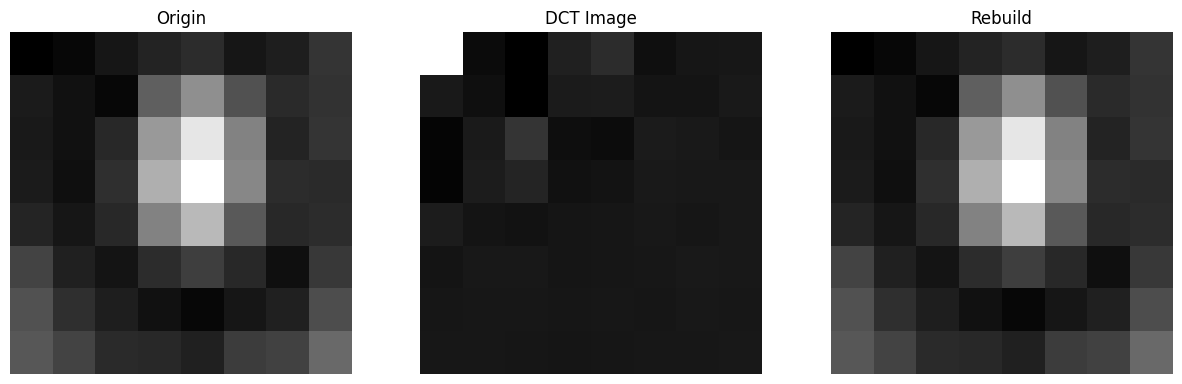

In [3]:
import numpy as np
from scipy.fftpack import dct, idct
import matplotlib.pyplot as plt

# 定義一個8x8的灰階影像
image = np.array([
    [52, 55, 61, 66, 70, 61, 64, 73],
    [63, 59, 55, 90, 109, 85, 69, 72],
    [62, 59, 68, 113, 144, 104, 66, 73],
    [63, 58, 71, 122, 154, 106, 70, 69],
    [67, 61, 68, 104, 126, 88, 68, 70],
    [79, 65, 60, 70, 77, 68, 58, 75],
    [85, 71, 64, 59, 55, 61, 65, 83],
    [87, 79, 69, 68, 65, 76, 78, 94]
])

# 對每一列進行DCT
dct_1d = dct(image, axis=0, norm='ortho')

# 對每一行進行DCT
dct_2d = dct(dct_1d, axis=1, norm='ortho')

# 對每一列進行IDCT（逆DCT）
idct_1d = idct(dct_2d, axis=0, norm='ortho')

# 對每一行進行IDCT
reconstructed_image = idct(idct_1d, axis=1, norm='ortho')

# 繪製原始影像、DCT 係數矩陣和重建的影像
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# 原始影像
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Origin')
axs[0].axis('off')

# DCT 係數矩陣
axs[1].imshow(dct_2d, cmap='gray')
axs[1].set_title('DCT Image')
axs[1].axis('off')

# 重建的影像
axs[2].imshow(np.round(reconstructed_image).astype(int), cmap='gray')
axs[2].set_title('Rebuild')
axs[2].axis('off')

plt.show()

In [4]:
!curl -o cat.jpg https://fluv.com/blog/wp-content/uploads/sites/2/2023/08/%E6%9C%AA%E5%91%BD%E5%90%8D%E8%A8%AD%E8%A8%88-18-e1691471855327.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1654k  100 1654k    0     0  4217k      0 --:--:-- --:--:-- --:--:-- 4252k


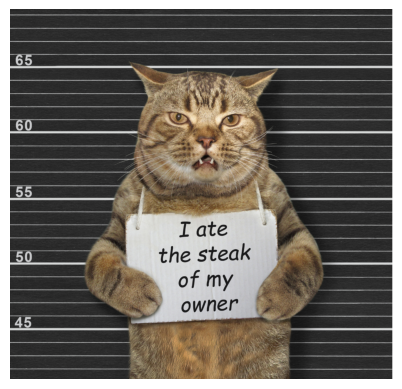

In [5]:
import matplotlib.pyplot as plt

# 讀取圖像
img = plt.imread('F:\\Code\\Digtal-Image-Processing\\cat.jpg')

# 顯示圖像
plt.imshow(img, cmap='gray')
plt.axis('off')  # 隱藏坐標軸
plt.show()


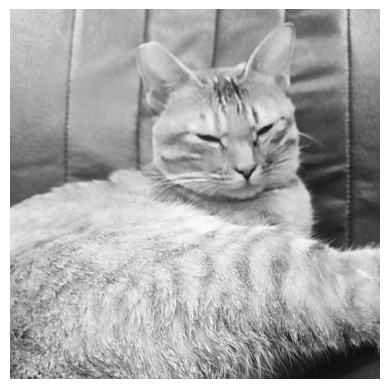

In [1]:
import numpy as np
from PIL import Image

def img_read_array(image_path, turn_to_gray=False):
    # 讀取圖像
    img = Image.open(image_path)
    
    # 如果需要轉換為灰階
    if turn_to_gray:
        img = img.convert('L')
    
    # 將圖像轉換為 NumPy 數組
    img_array = np.array(img)
    
    return img_array

# 使用示例
image_path =  r'F:\Code\Digtal-Image-Processing\LAB_CAT2.jpg'
img_array = img_read_array(image_path, turn_to_gray=True)

# 顯示灰階圖像
import matplotlib.pyplot as plt
plt.imshow(img_array, cmap='gray')
plt.axis('off')  # 隱藏坐標軸
plt.show()


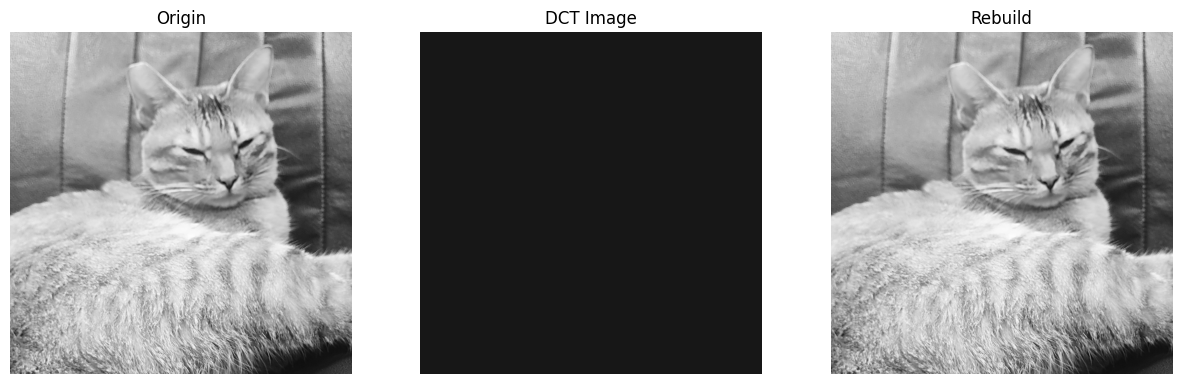

In [2]:
from scipy.fftpack import dct, idct
from scipy.ndimage import uniform_filter

# 對每一列進行DCT
dct_1d = dct(img_array, axis=0, norm='ortho')

# 對每一行進行DCT
dct_2d = dct(dct_1d, axis=1, norm='ortho')

# 對每一列進行IDCT（逆DCT）
idct_1d = idct(dct_2d, axis=0, norm='ortho')

# 對每一行進行IDCT
reconstructed_image = idct(idct_1d, axis=1, norm='ortho')

# 繪製原始影像、DCT 係數矩陣和重建的影像
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# 原始影像
axs[0].imshow(img_array, cmap='gray')
axs[0].set_title('Origin')
axs[0].axis('off')

# DCT 係數矩陣
axs[1].imshow(dct_2d, cmap='gray')
axs[1].set_title('DCT Image')
axs[1].axis('off')

# 重建的影像
axs[2].imshow(np.round(reconstructed_image).astype(int), cmap='gray')
axs[2].set_title('Rebuild')
axs[2].axis('off')

plt.show()

In [7]:
img_array.shape, dct_2d.shape

((1080, 1118), (1080, 1118))

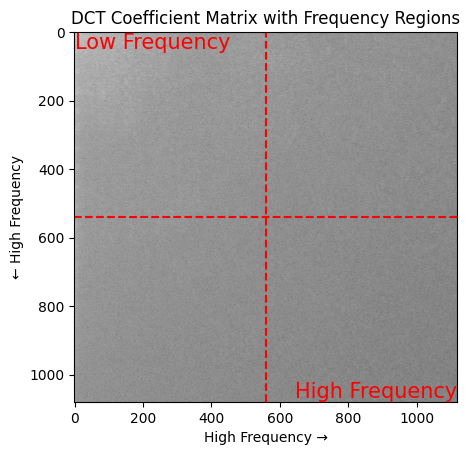

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.fftpack import dct, idct

def img_read_array(image_path, turn_to_gray=False):
    img = Image.open(image_path)
    if turn_to_gray:
        img = img.convert('L')
    img_array = np.array(img)
    return img_array

def heatmap(array):
    # 取絕對值並加上微小值避免對數計算的錯誤
    array = np.abs(array) + 1e-15
    log_array = np.log(array)
    normalized_log_array = (log_array - np.min(log_array)) / (np.max(log_array) - np.min(log_array))
    return normalized_log_array

def display_dct_regions(dct_matrix):
    plt.imshow(dct_matrix, cmap='gray')
    plt.title('DCT Coefficient Matrix with Frequency Regions')
    plt.xlabel('High Frequency →')
    plt.ylabel('← High Frequency')
    
    # 標註區域
    plt.axvline(x=dct_matrix.shape[1]/2-0.5, color='red', linestyle='--')
    plt.axhline(y=dct_matrix.shape[0]/2-0.5, color='red', linestyle='--')
    plt.text(0, 0, 'Low Frequency', color='red', fontsize=15, ha='left', va='top')
    plt.text(dct_matrix.shape[1]-1, dct_matrix.shape[0]-1, 'High Frequency', color='red', fontsize=15, ha='right', va='bottom')
    
    plt.show()

# 讀取灰階圖像
image_path = 'F:\\Code\\Digtal-Image-Processing\\cat.jpg'
img_array = img_read_array(image_path, turn_to_gray=True)

# 對每一列進行DCT
dct_1d = dct(img_array, axis=0, norm='ortho')

# 對每一行進行DCT
dct_2d = dct(dct_1d, axis=1, norm='ortho')

# 生成熱圖
dct_heatmap = heatmap(dct_2d)

# 顯示DCT矩陣並標註頻率區域
display_dct_regions(dct_heatmap)


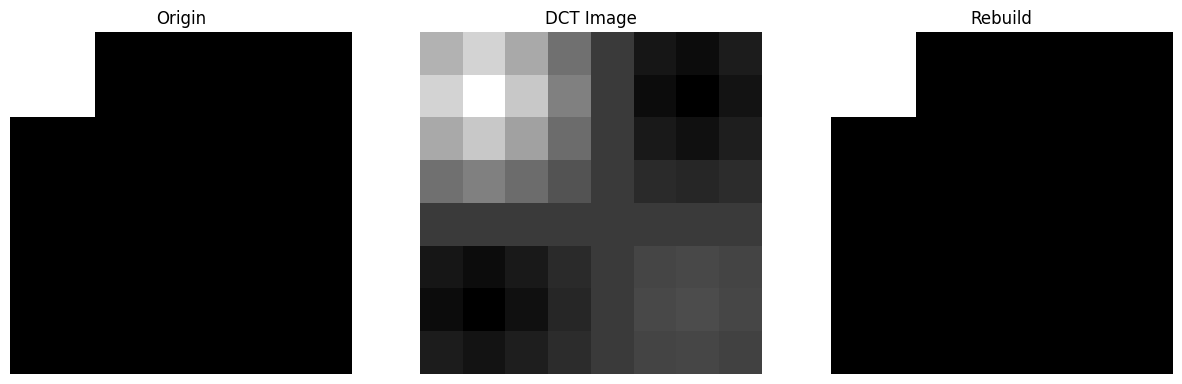

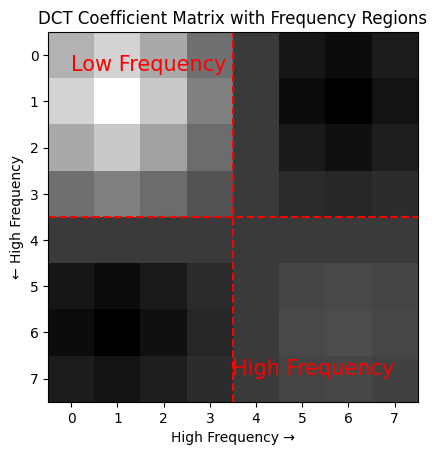

In [65]:
import numpy as np
from scipy.fftpack import dct, idct
import matplotlib.pyplot as plt


def dct_image(image):
    
    # 對每一列進行DCT
    dct_1d = dct(image, axis=0, norm='ortho')

    # 對每一行進行DCT
    return dct(dct_1d, axis=1, norm='ortho')

def idct_image(dct_2d): 

    # 對每一列進行IDCT（逆DCT）
    idct_1d = idct(dct_2d, axis=0, norm='ortho')

    # 對每一行進行IDCT
    return idct(idct_1d, axis=1, norm='ortho')

def compare_dct_images(image, dct_2d, reconstructed_image, show=True):
    
    # 繪製原始影像、DCT 係數矩陣和重建的影像
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # 原始影像
    axs[0].imshow(image, cmap='gray')
    axs[0].set_title('Origin')
    axs[0].axis('off')

    # DCT 係數矩陣
    axs[1].imshow(dct_2d, cmap='gray')
    axs[1].set_title('DCT Image')
    axs[1].axis('off')

    # 重建的影像
    axs[2].imshow(np.round(reconstructed_image).astype(int), cmap='gray')
    axs[2].set_title('Rebuild')
    axs[2].axis('off')

# 定義一個8x8的灰階影像
image = np.zeros(shape=(8, 8))

image[:2, :2] = 1
# image[-1][-1] = 1

dct_2d = dct_image(image)

reconstructed_image = idct_image(dct_2d)

compare_dct_images(image, dct_2d, reconstructed_image)


plt.figure()
# 生成熱圖
dct_heatmap = heatmap(dct_2d)
# 顯示DCT矩陣並標註頻率區域
display_dct_regions(dct_2d)

In [18]:
a = np.zeros(shape=(8, 8))

for frame in range(16):
    i = (frame // 4)*2
    j = frame*2 - i*4
    # j = frame % i * 2
    print(i, j)

0 0
0 2
0 4
0 6
2 0
2 2
2 4
2 6
4 0
4 2
4 4
4 6
6 0
6 2
6 4
6 6


In [23]:
from IPython.display import display, clear_output
import time

def dct_jupyter_animate(image):
    # 計算 DCT 和重建影像
    dct_2d = dct_image(image)

    # 顯示影像、DCT 和重建影像
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(dct_2d, cmap='gray')
    plt.title('DCT')
    plt.axis('off')

    plt.show()
    
    clear_output(wait=True)
    time.sleep(0.1)  # 可以調整為更合適的延遲時間

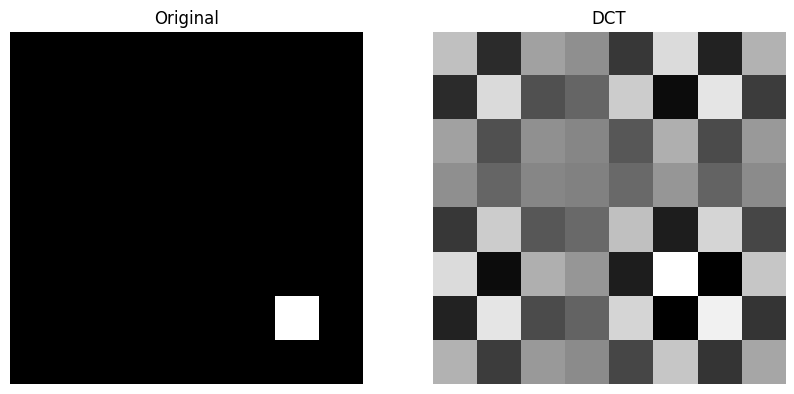

In [22]:
images = []

# 執行逐格動畫
for frame in range(16):
    i = (frame // 4)*2
    j = frame*2 - i*4
    
    # 定義一個8x8的灰階影像
    image = np.zeros(shape=(8, 8))
    image[i][j] = 1

    dct_jupyter_animate(image)

    images.append(image)

In [28]:
a = np.zeros(shape=(8, 8))
a[:5, :5] = 1
a

array([[1., 1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

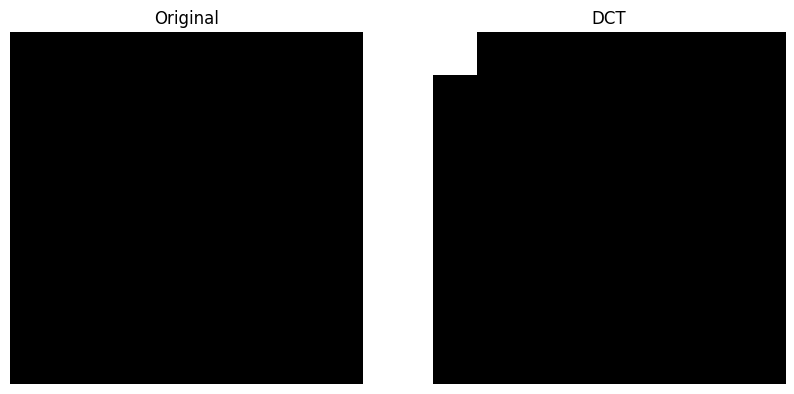

In [45]:
images = []

# 執行逐格動畫
for i in range(9):
    
    # 定義一個8x8的灰階影像
    image = np.random.random(size=(8, 8))
    image[:i, :i] = 1

    dct_jupyter_animate(image)

    images.append(image)

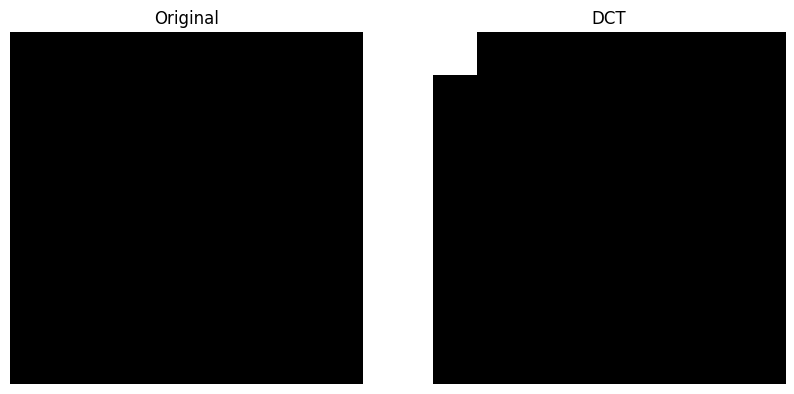

In [40]:
images = []

# 執行逐格動畫
for i in range(9):
    
    # 定義一個8x8的灰階影像
    image = np.zeros(shape=(8, 8))
    image[:i, :i] = 1

    dct_jupyter_animate(image)

    images.append(image)

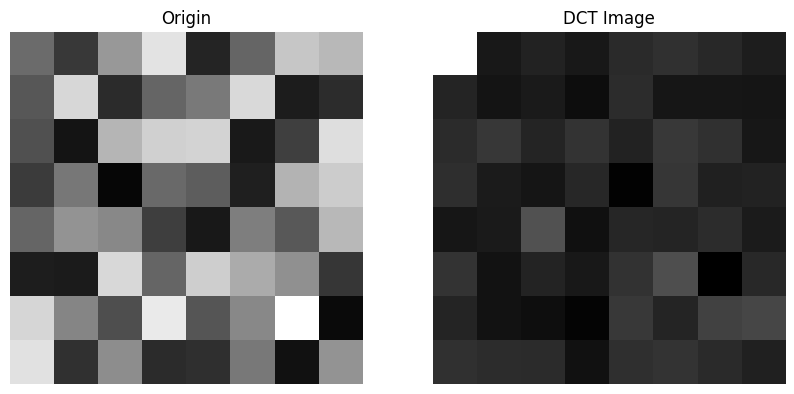

In [46]:
import numpy as np
from scipy.fftpack import dct, idct
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import IFrame

def dct_image(image):
    """對影像進行離散餘弦變換（DCT）"""
    dct_1d = dct(image, axis=0, norm='ortho')
    return dct(dct_1d, axis=1, norm='ortho')

def update(frame, images):
    """更新每一帧的動畫"""
    image = images[frame]
    
    # 計算 DCT 和重建影像
    dct_2d = dct_image(image)
    reconstructed_image = idct_image(dct_2d)

    axs[0].imshow(image, cmap='gray', vmin=0, vmax=1)
    axs[0].set_title('Origin')
    axs[0].axis('off')

    # im = axs[1].imshow(dct_2d, cmap='gray', vmin=np.min(dct_2d), vmax=np.max(dct_2d))
    axs[1].imshow(dct_2d, cmap='gray', vmin=np.min(dct_2d), vmax=np.max(dct_2d))
    
    axs[1].set_title('DCT Image')
    axs[1].axis('off')
    
    # # 刪除之前的 colorbar，如果存在
    # if hasattr(update, 'colorbar'):
    #     update.colorbar.remove()

    # # 添加新的 colorbar
    # update.colorbar = fig.colorbar(im, ax=axs[1], fraction=0.046, pad=0.04)

    return axs

# 創建圖形和子圖
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# 計算符合條件的幀數
num_frames = len(images)

# 創建動畫
anim = FuncAnimation(fig, update, frames=num_frames, fargs=(images, ), interval=500, blit=False)

# 保存動畫為 MP4 格式
anim.save('animation.mp4', writer='ffmpeg')

# 使用 IFrame 顯示動畫
IFrame('animation.mp4', width=600, height=400)


In [38]:
try:
    import moviepy
except:
    !pip install moviepy

In [45]:
from moviepy.editor import VideoFileClip

def mp4_to_gif(mp4_file, gif_file):
    """將 MP4 影片轉換為 GIF 動畫"""
    # 載入 MP4 影片
    clip = VideoFileClip(mp4_file)
    
    # 將影片轉換為 GIF
    clip.write_gif(gif_file, fps=clip.fps*2)

# 指定 MP4 和 GIF 檔案名稱
mp4_file = 'animation.mp4'
gif_file = 'animation.gif'

# 轉換 MP4 為 GIF
mp4_to_gif(mp4_file, gif_file)


MoviePy - Building file animation.gif with imageio.
